**INSTALL ULTRALYSTICS AND MANY MORE OF LIBRARY**

In [1]:
%pip install ultralytics
%pip install inference-sdk
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 532, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'benchmark', 'predict', 'export', 'train', 'track', 'val'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'segment', 'pose', 'obb', 'detect', 'classify'}
                MODE (required) is one of {'benchmark', 'predict', 'export', 'train', 'track', 'val'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

**INSTALL ROBOFLOW**

IN THIS LINE I USING ROBOFLOW FOR ACCESSING MY DATASET FROM GOOGLE OR WEB
AND YOLOV8 FOR DATASET'S VERSION, SO MY DATASET HAS BEEN READED





In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3REh5WekclzVb2idBgvy")
project = rf.workspace("liteye-systems").project("weapon-classification")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.46, to fix: `pip install ultralytics==8.0.196`


**TRAIN MODEL WITH EPOCHS**


BUT BEFORE I TRAIN THE MODEL , I SHOULD TO CONFIGURATE OR SETTING THE DATA.YML SO THE TRAIN WILL BE SUCCESSFULLY, FOR THIS CASE I SET 10 EPOCHS

In [8]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

Ultralytics YOLOv8.2.46 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Weapon-classification-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

AFTER TRAINNING THE EPOCHS, THE PARAMETERS OF TRAIN WILL SHOW US 3 TIMES, SUCH AS TRAIN,TRAIN2, AND TRAIN3 SO I HAVE TO USING THE LATEST TRAIN WHICH IS TRAIN3

In [22]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.46 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Weapon-classification-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100% 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:04<00:00,  1.98it/s]
                   all        117        132      0.778      0.735      0.801      0.516
               handgun         39         39      0.717      0.744      0.764      0.507
                 rifle         79         93      0.839      0.727      0.838      0.524
Speed: 4.7ms preprocess, 8.5ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


LOAD THE IMAGE AND WE HAVE 2 LABELS IN MY IMAGE DATASET


**HANDGUNS AND RIFLE**

In [23]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt source="/content/Weapon-classification-1/test/images"

Ultralytics YOLOv8.2.46 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/57 /content/Weapon-classification-1/test/images/1--106-_jpg.rf.958701ed5c2bef8d4d0b50f7c73e950e.jpg: 640x640 1 handgun, 11.6ms
image 2/57 /content/Weapon-classification-1/test/images/1--109-_jpg.rf.86bb65eadd800e6cccaac7ad396e7643.jpg: 640x640 2 handguns, 7.4ms
image 3/57 /content/Weapon-classification-1/test/images/1--116-_jpg.rf.9b7a13171a42934346a22005e1c2d594.jpg: 640x640 2 handguns, 7.3ms
image 4/57 /content/Weapon-classification-1/test/images/1--117-_jpg.rf.9198ab39ea371405b1304f6763f6b33f.jpg: 640x640 3 handguns, 7.3ms
image 5/57 /content/Weapon-classification-1/test/images/1--145-_jpg.rf.ce0faf312f3537970ac8b1a4be763111.jpg: 640x640 1 handgun, 7.3ms
image 6/57 /content/Weapon-classification-1/test/images/1--151-_jpg.rf.86148e98051b6b6db6ac4112c6e04274.jpg: 640x640 1 handgun, 7.3ms
image 7/57 /content/Weapo

IMPORT THE LIBRARY

In [13]:
import os
import random
from ultralytics import YOLO
from IPython.display import display, Image, clear_output
import cv2
from PIL import Image as PILImage
import numpy as np

IN THIS CASE I DISPLAY THE RESULT AND THE RESULT IS NOT REALLY PRECISION AND I NEED TO TRAIN MODEL FOR THE SECOND TIME


AS WE CAN SEE, AT THE LAST IMAGES I MISSING ONE RIFFLE DETECTION

"image 1/1 /content/Weapon-classification-1/test/images/2--291-_jpg.rf.3026ee86e72e5769256ffec7e3880473.jpg: 640x640 **(no detections),** 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)"

Selected images for testing:
/content/Weapon-classification-1/test/images/1--3-t_jpg.rf.0136d50ca837408f4875a24d997d330a.jpg
/content/Weapon-classification-1/test/images/1--48-_jpg.rf.d9c0370457d612805d9e5ea7f7bac755.jpg
/content/Weapon-classification-1/test/images/2--93-_jpg.rf.284cf3ab69beb253b1a050436d53293c.jpg
/content/Weapon-classification-1/test/images/1--151-_jpg.rf.86148e98051b6b6db6ac4112c6e04274.jpg
/content/Weapon-classification-1/test/images/2--291-_jpg.rf.3026ee86e72e5769256ffec7e3880473.jpg

image 1/1 /content/Weapon-classification-1/test/images/1--3-t_jpg.rf.0136d50ca837408f4875a24d997d330a.jpg: 640x640 1 handgun, 7.3ms
Speed: 2.0ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


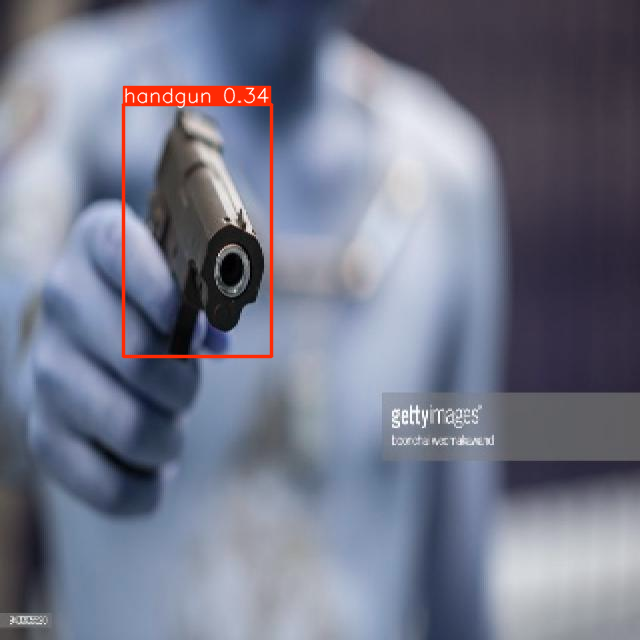


image 1/1 /content/Weapon-classification-1/test/images/1--48-_jpg.rf.d9c0370457d612805d9e5ea7f7bac755.jpg: 640x640 2 handguns, 10.1ms
Speed: 1.6ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


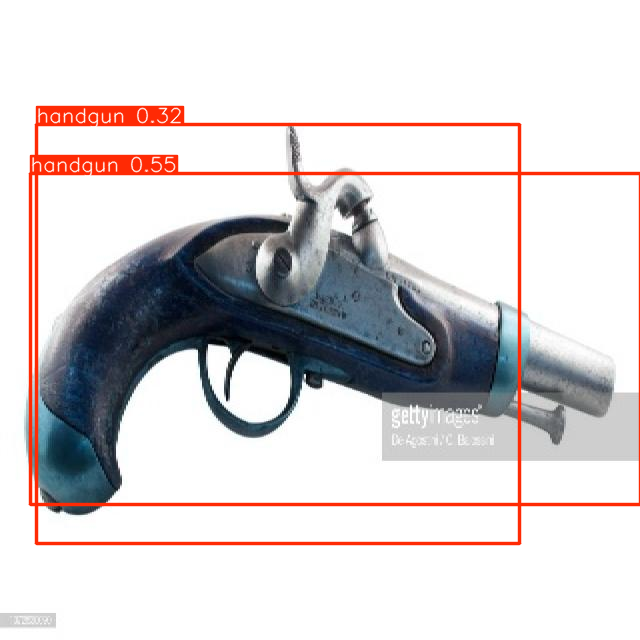


image 1/1 /content/Weapon-classification-1/test/images/2--93-_jpg.rf.284cf3ab69beb253b1a050436d53293c.jpg: 640x640 1 rifle, 10.8ms
Speed: 2.5ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


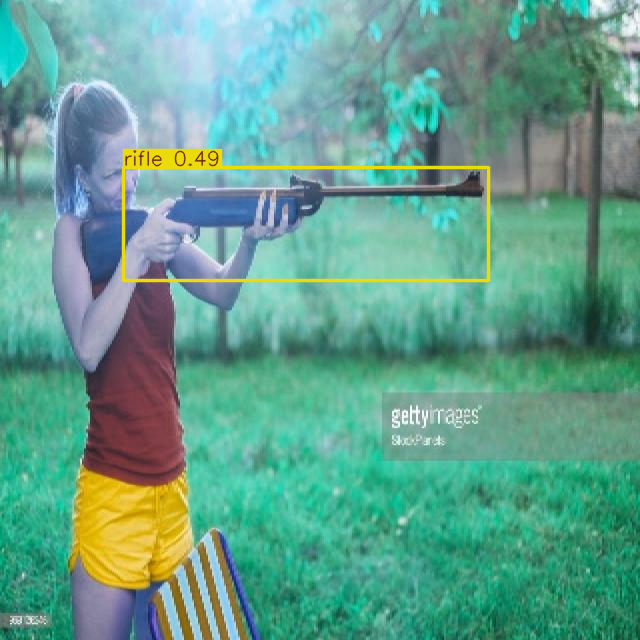


image 1/1 /content/Weapon-classification-1/test/images/1--151-_jpg.rf.86148e98051b6b6db6ac4112c6e04274.jpg: 640x640 1 handgun, 10.1ms
Speed: 3.3ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


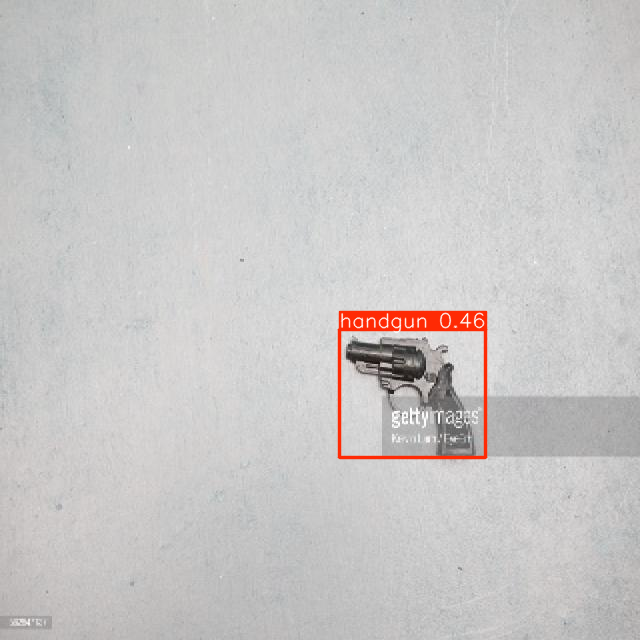


image 1/1 /content/Weapon-classification-1/test/images/2--291-_jpg.rf.3026ee86e72e5769256ffec7e3880473.jpg: 640x640 (no detections), 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


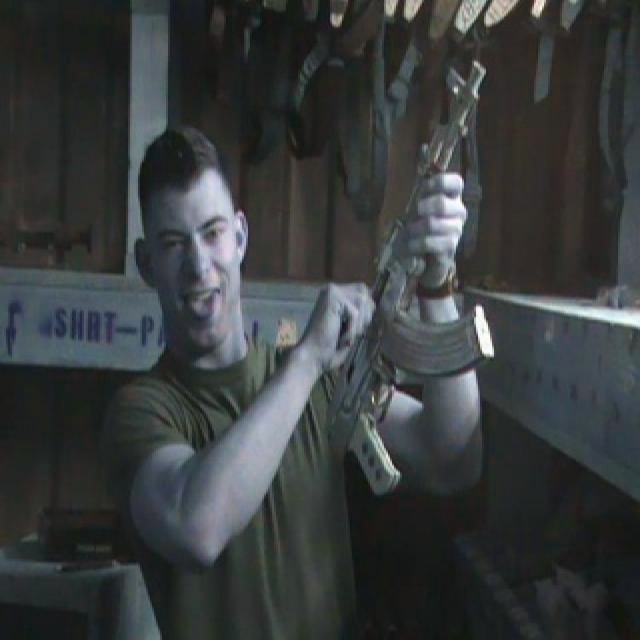

In [29]:

image_directory = '/content/Weapon-classification-1/test/images'


all_images = [os.path.join(image_directory, img) for img in os.listdir(image_directory) if img.endswith(('.png', '.jpg', '.jpeg'))]


random_images = random.sample(all_images, 5)


print("Selected images for testing:")
for img in random_images:
    print(img)

# Load your trained YOLO model
model = YOLO('/content/runs/detect/train3/weights/best.pt')


for img_path in random_images:
    results = model(img_path)
    for result in results:
        # Get the image with detections as a NumPy array
        result_img = result.plot()

        # Convert the NumPy array to an image format that IPython can display
        result_img = PILImage.fromarray(result_img)

        # Display the image
        display(result_img)

AFTER THAT, I SHOW THE CONFUSION MATRIX NORMALIZED AND AT THE END I WILL COMPARE THIS CONFUSION MATRIX

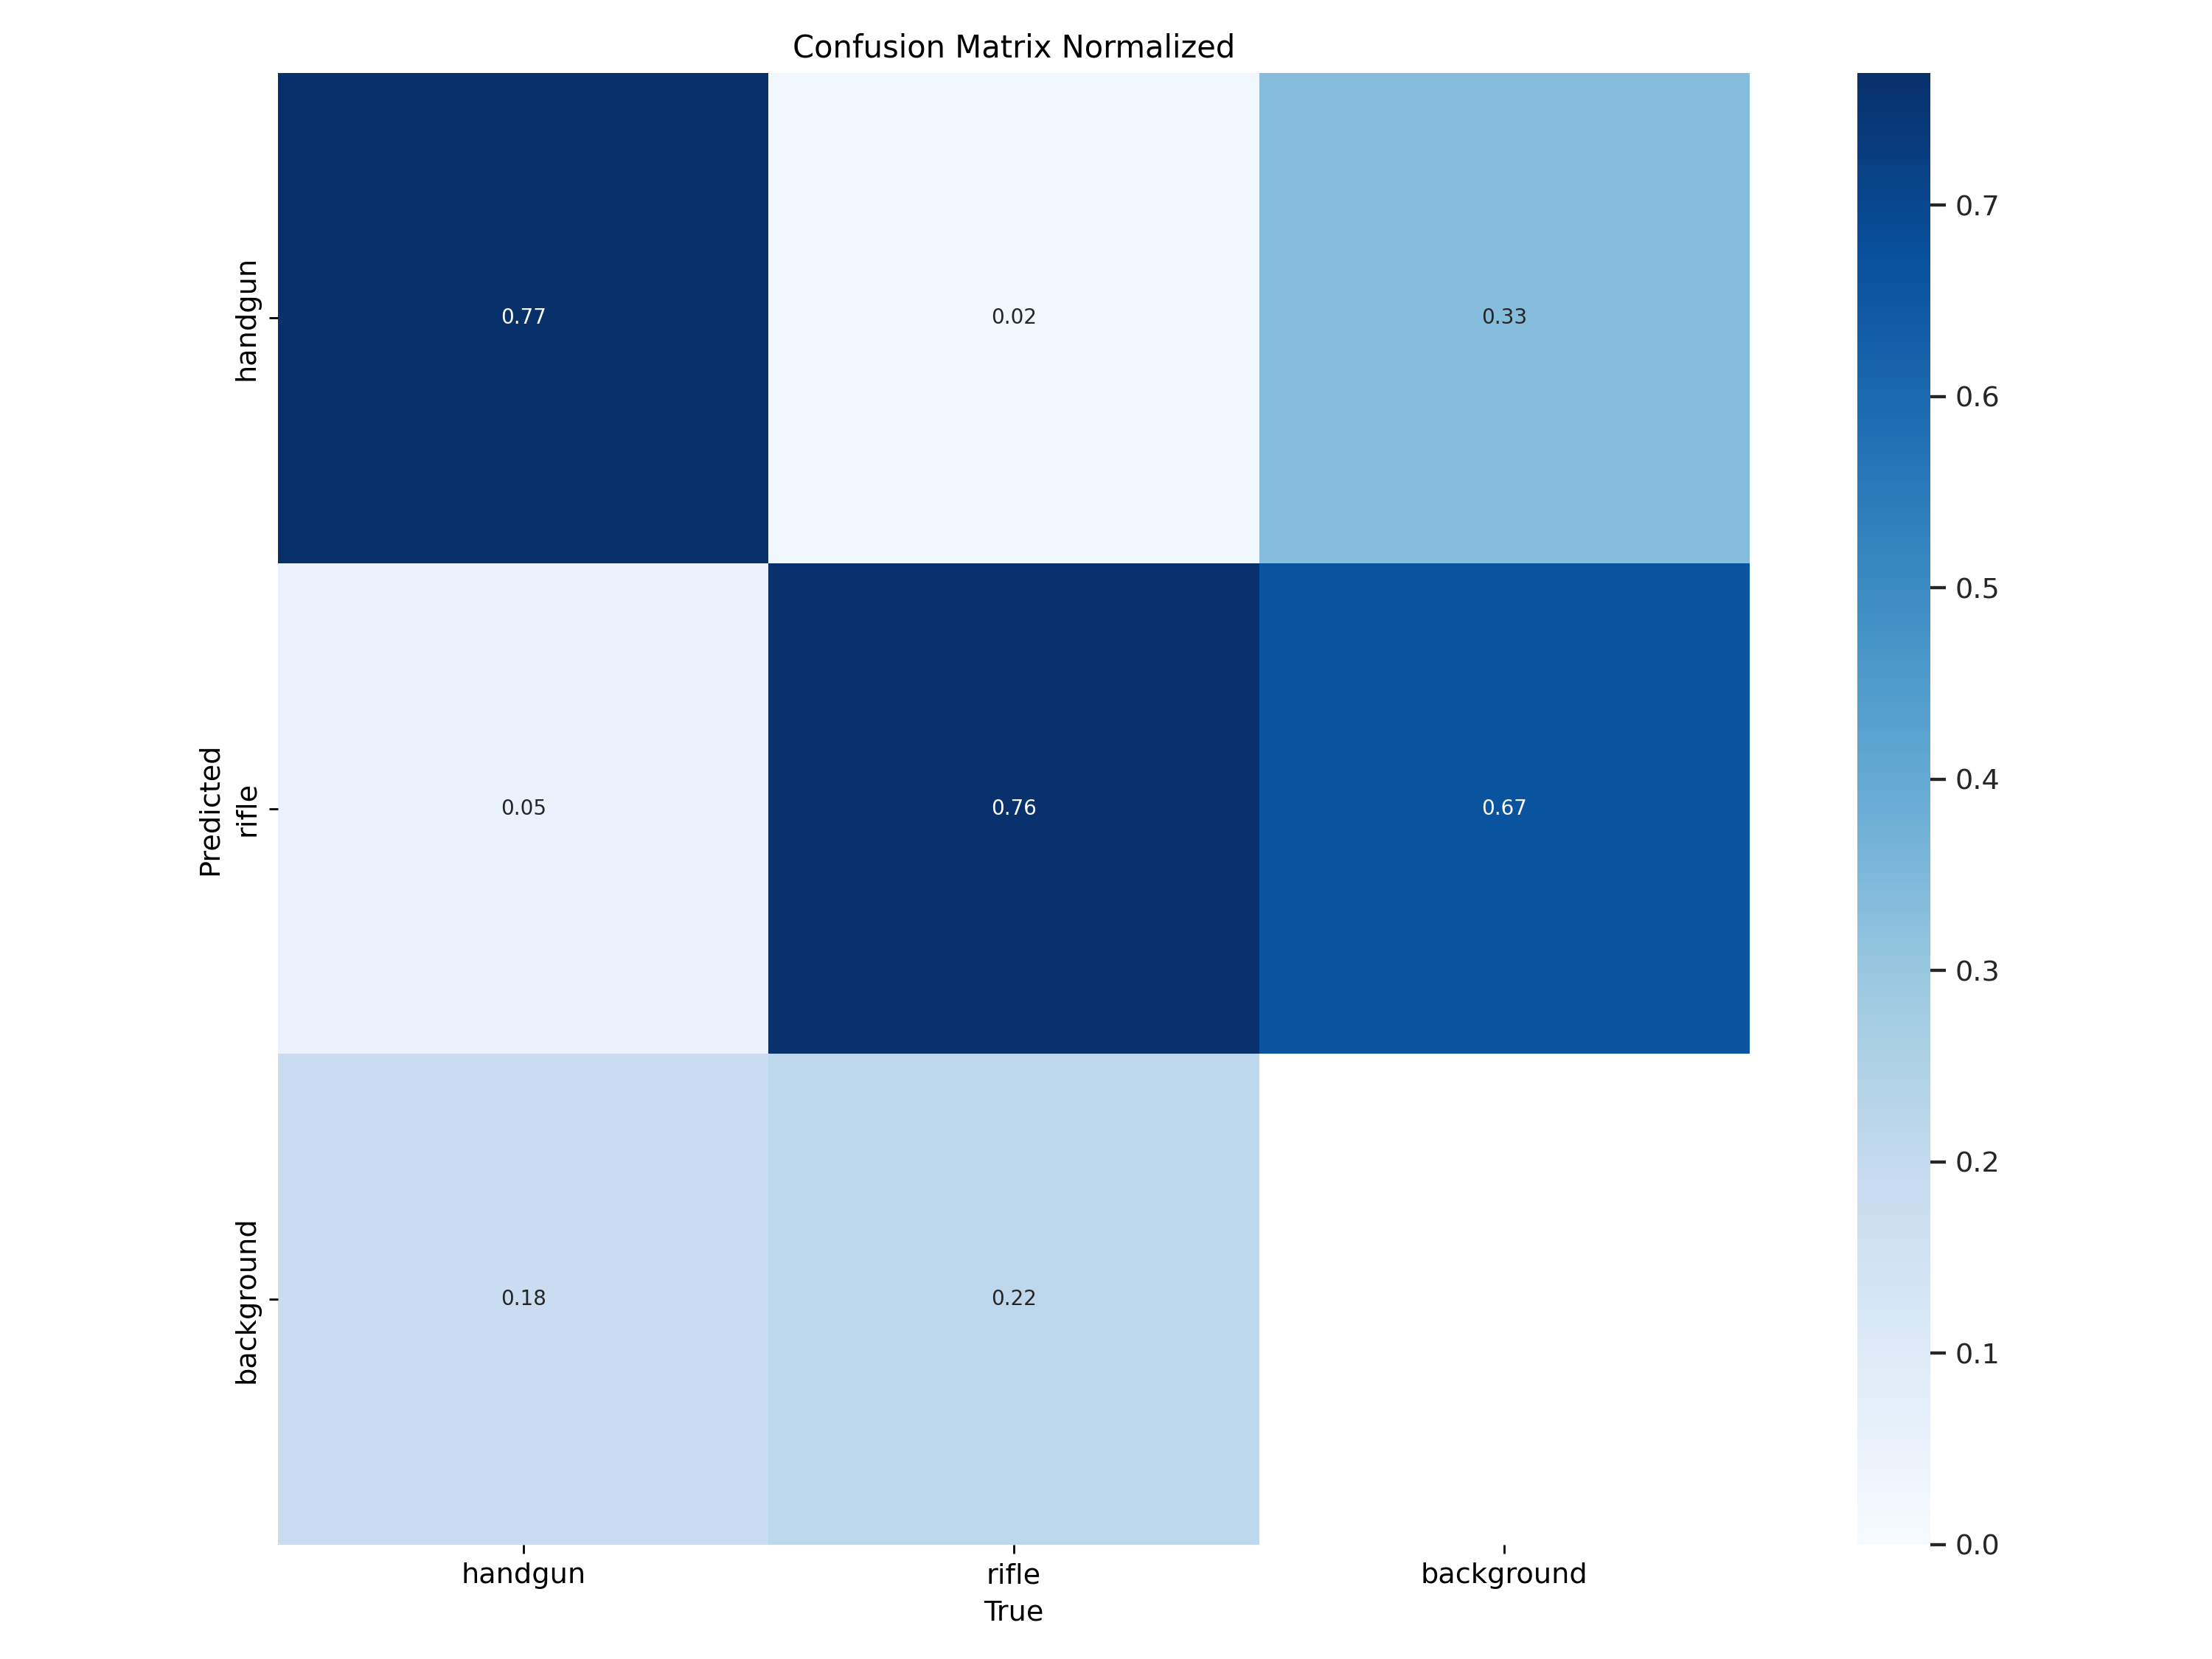

In [55]:
Image(filename = f'/content/runs/detect/train3/confusion_matrix_normalized.png')

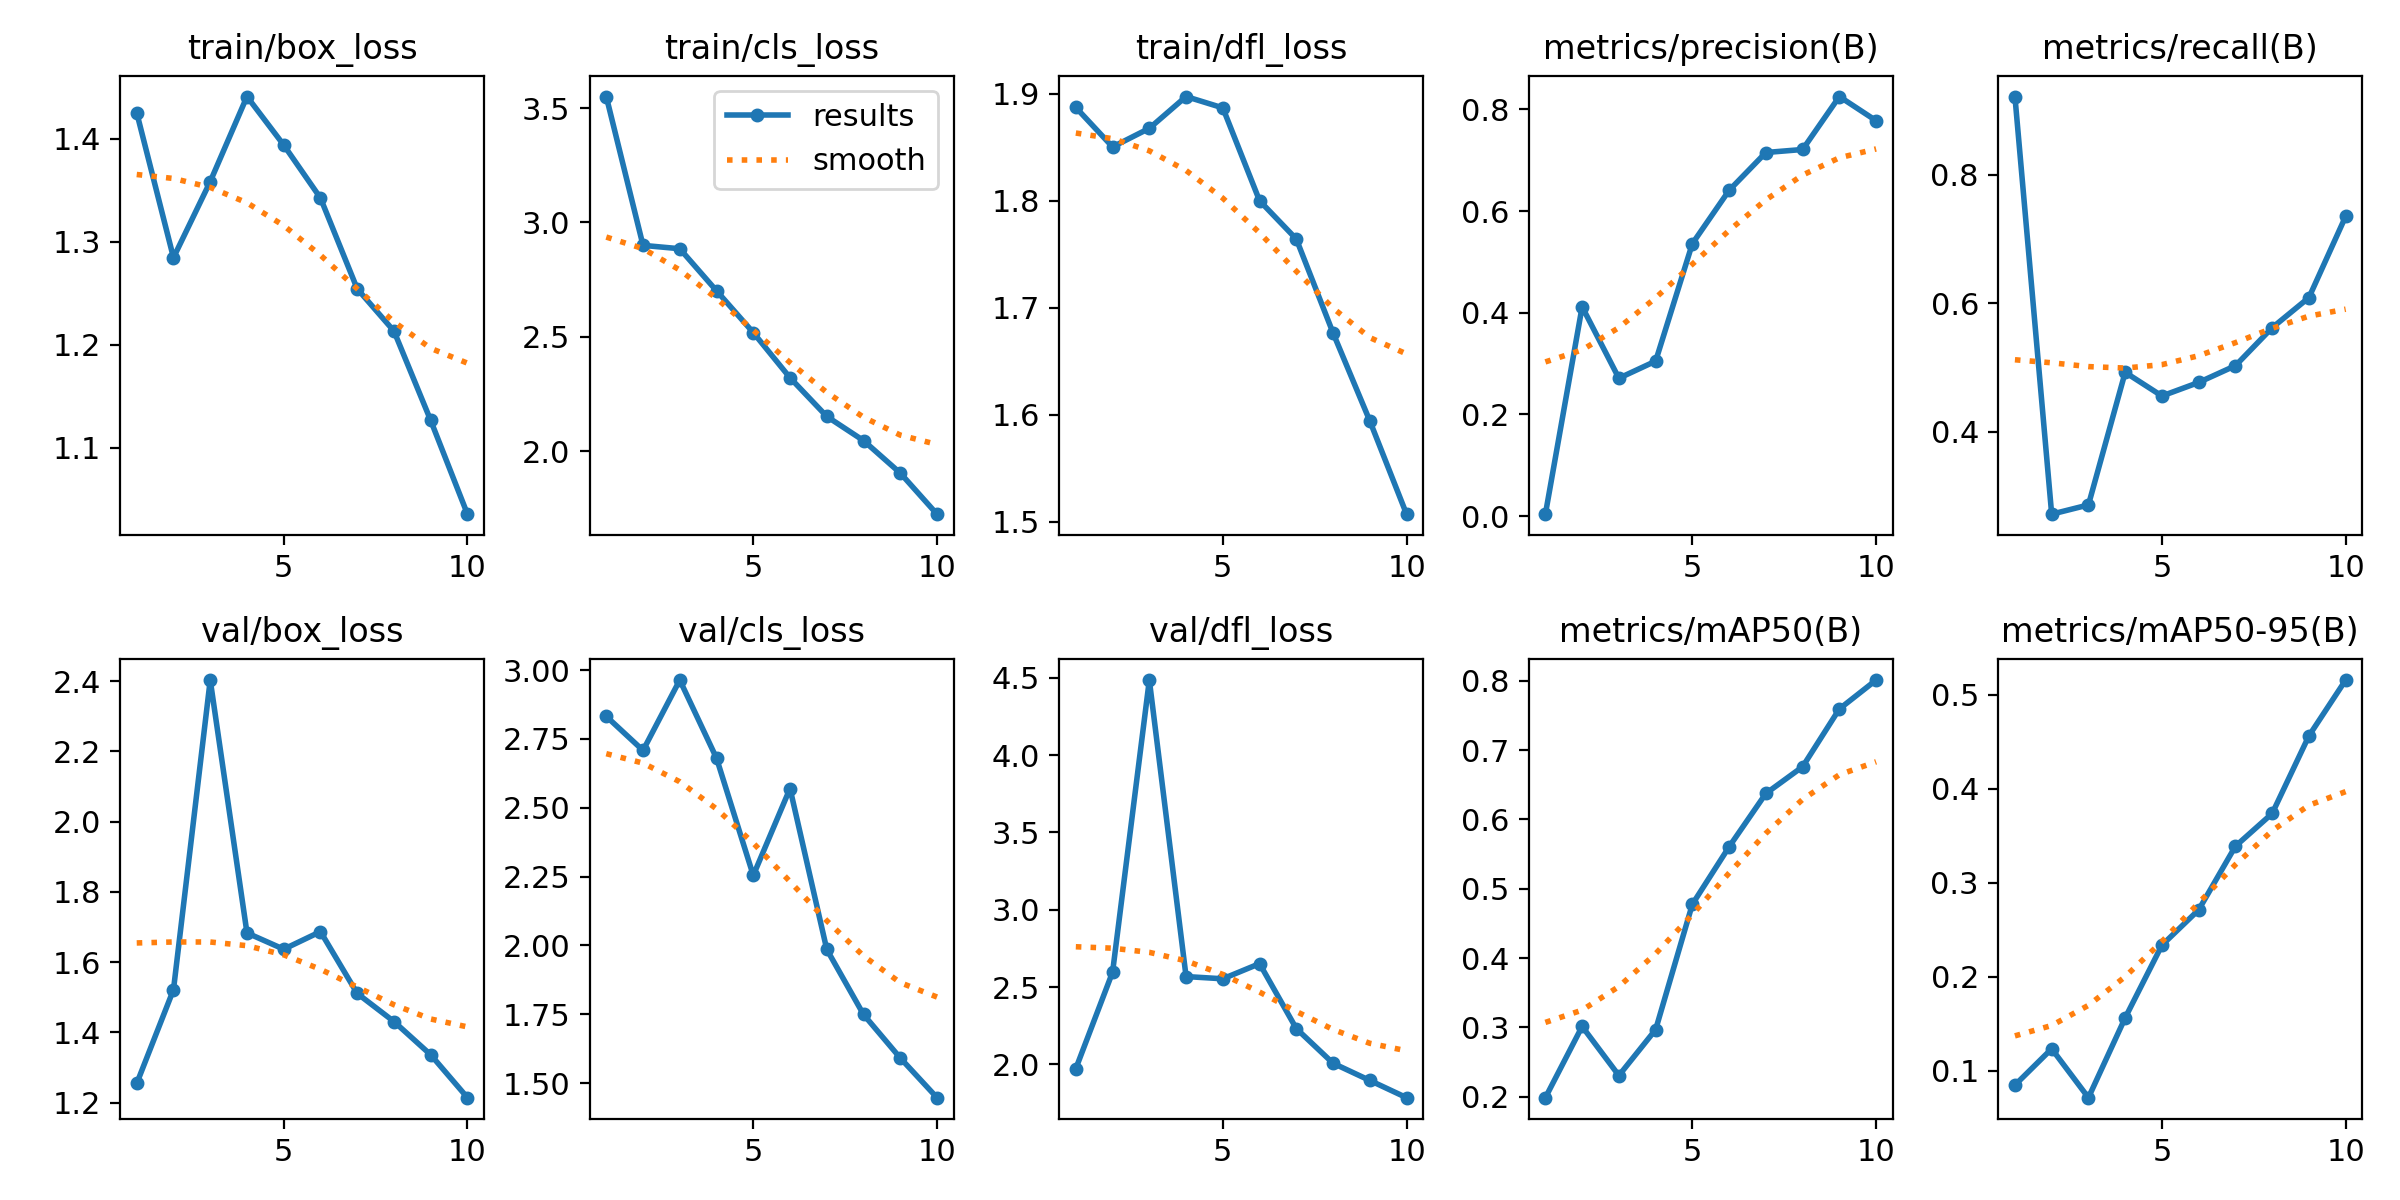

In [33]:
Image(filename = f'/content/runs/detect/train3/results.png')

**TRAIN FOR THE SECOND TIME**

I WILL TRAIN AGAIN THE MODEL WITH 20 EPOCHS

In [17]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.2.46 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Weapon-classification-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

AND FOR THE PARAMETERS OF COURSE IT WILL CHANGE ANYMORE BECAUSE WE TRAINNING AGAIN, I SET TRAIN 4

In [24]:
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.46 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Weapon-classification-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100% 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.47it/s]
                   all        117        132      0.791      0.734      0.845      0.556
               handgun         39         39      0.816      0.641       0.81      0.556
                 rifle         79         93      0.765      0.828       0.88      0.556
Speed: 9.2ms preprocess, 9.3ms inference, 0.1ms loss, 9.4ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [25]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt source="/content/Weapon-classification-1/test/images"

Ultralytics YOLOv8.2.46 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/57 /content/Weapon-classification-1/test/images/1--106-_jpg.rf.958701ed5c2bef8d4d0b50f7c73e950e.jpg: 640x640 1 handgun, 10.3ms
image 2/57 /content/Weapon-classification-1/test/images/1--109-_jpg.rf.86bb65eadd800e6cccaac7ad396e7643.jpg: 640x640 1 handgun, 7.4ms
image 3/57 /content/Weapon-classification-1/test/images/1--116-_jpg.rf.9b7a13171a42934346a22005e1c2d594.jpg: 640x640 1 handgun, 7.3ms
image 4/57 /content/Weapon-classification-1/test/images/1--117-_jpg.rf.9198ab39ea371405b1304f6763f6b33f.jpg: 640x640 4 handguns, 7.3ms
image 5/57 /content/Weapon-classification-1/test/images/1--145-_jpg.rf.ce0faf312f3537970ac8b1a4be763111.jpg: 640x640 1 handgun, 7.3ms
image 6/57 /content/Weapon-classification-1/test/images/1--151-_jpg.rf.86148e98051b6b6db6ac4112c6e04274.jpg: 640x640 1 handgun, 7.3ms
image 7/57 /content/Weapon-

**SHOWING THE OUTPUT**

THERE ARE 4 OUTPUT THAT SHOWING US ALL OF THE IMAGES OF THE GUN (RIFLE OR HANDGUN) HAS BEEN DETECTION BY THE MODEL

Selected images for testing:
/content/Weapon-classification-1/test/images/1--3-t_jpg.rf.0136d50ca837408f4875a24d997d330a.jpg
/content/Weapon-classification-1/test/images/2--345-_jpg.rf.14b6250e1edc16dbdf697c1965087922.jpg
/content/Weapon-classification-1/test/images/2--161-_jpg.rf.abdb88146e27e585af3f70572bc59396.jpg
/content/Weapon-classification-1/test/images/1--98-_jpg.rf.d2d740cefe61985bff3b508a8541da9f.jpg
/content/Weapon-classification-1/test/images/2--210-_jpg.rf.75307c969e98293860f628aa03ffa210.jpg

image 1/1 /content/Weapon-classification-1/test/images/1--3-t_jpg.rf.0136d50ca837408f4875a24d997d330a.jpg: 640x640 1 handgun, 7.3ms
Speed: 1.9ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


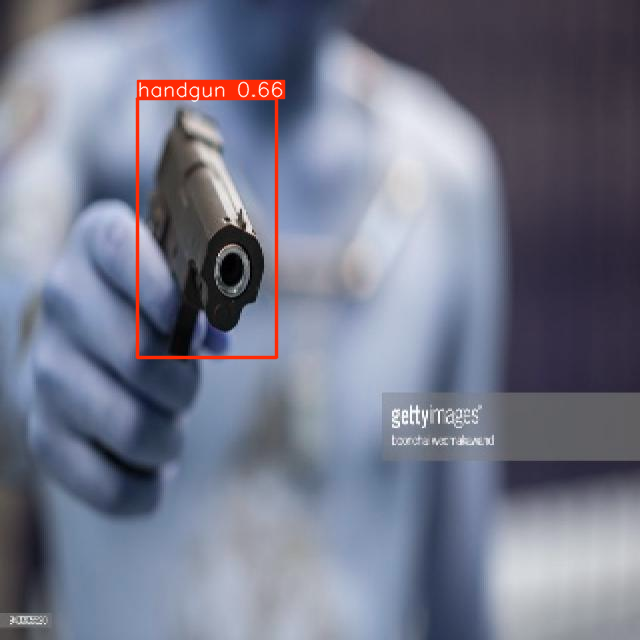


image 1/1 /content/Weapon-classification-1/test/images/2--345-_jpg.rf.14b6250e1edc16dbdf697c1965087922.jpg: 640x640 2 rifles, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


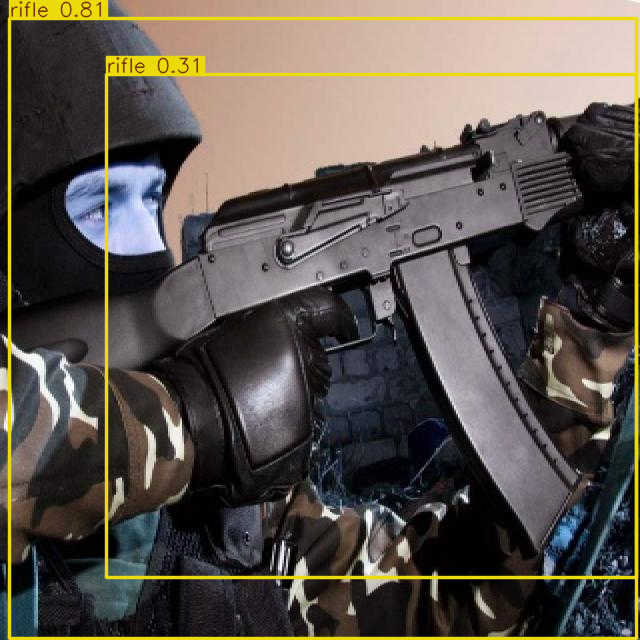


image 1/1 /content/Weapon-classification-1/test/images/2--161-_jpg.rf.abdb88146e27e585af3f70572bc59396.jpg: 640x640 1 rifle, 9.6ms
Speed: 2.4ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


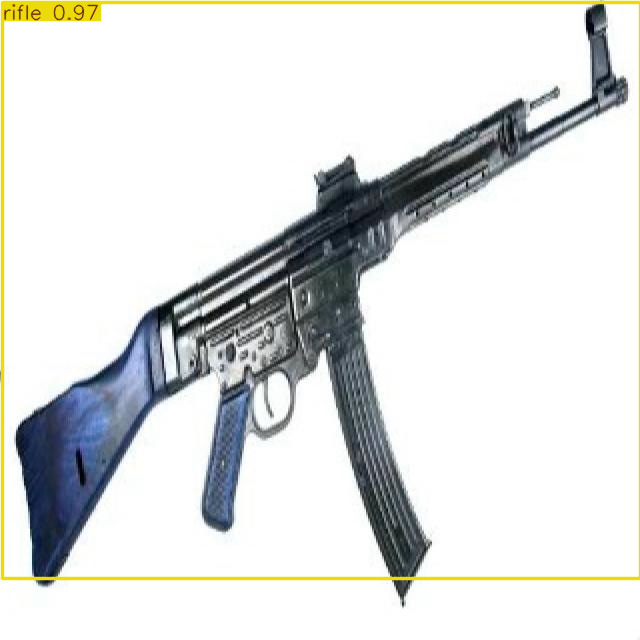


image 1/1 /content/Weapon-classification-1/test/images/1--98-_jpg.rf.d2d740cefe61985bff3b508a8541da9f.jpg: 640x640 1 handgun, 10.5ms
Speed: 2.5ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


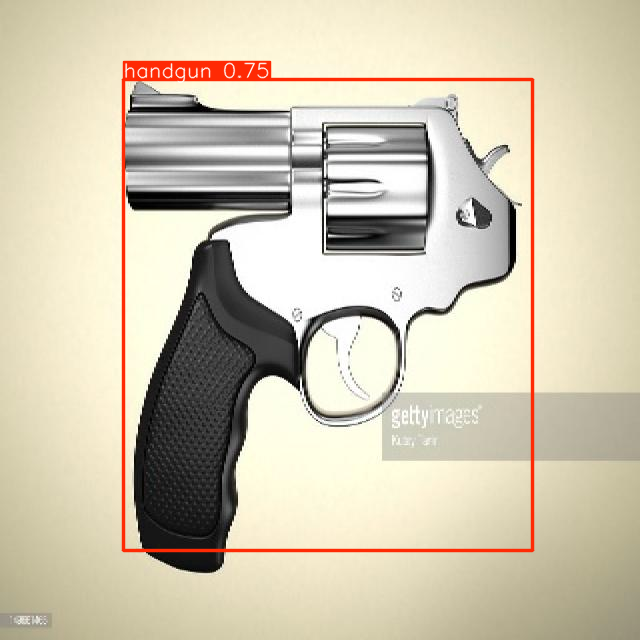


image 1/1 /content/Weapon-classification-1/test/images/2--210-_jpg.rf.75307c969e98293860f628aa03ffa210.jpg: 640x640 1 rifle, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


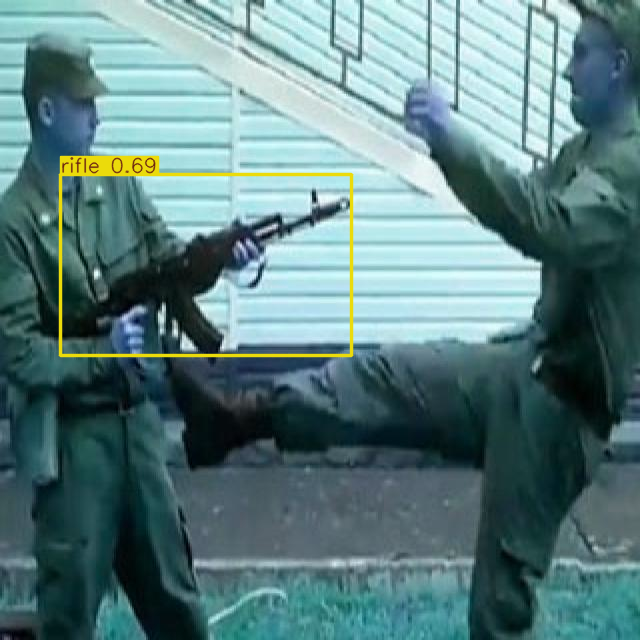

In [27]:

image_directory = '/content/Weapon-classification-1/test/images'


all_images = [os.path.join(image_directory, img) for img in os.listdir(image_directory) if img.endswith(('.png', '.jpg', '.jpeg'))]


random_images = random.sample(all_images, 5)


print("Selected images for testing:")
for img in random_images:
    print(img)

# Load your trained YOLO model
model = YOLO('/content/runs/detect/train4/weights/best.pt')


for img_path in random_images:
    results = model(img_path)
    for result in results:
        # Get the image with detections as a NumPy array
        result_img = result.plot()

        # Convert the NumPy array to an image format that IPython can display
        result_img = PILImage.fromarray(result_img)

        # Display the image
        display(result_img)

THIS CONFUSION MATRIX NORMALIZED

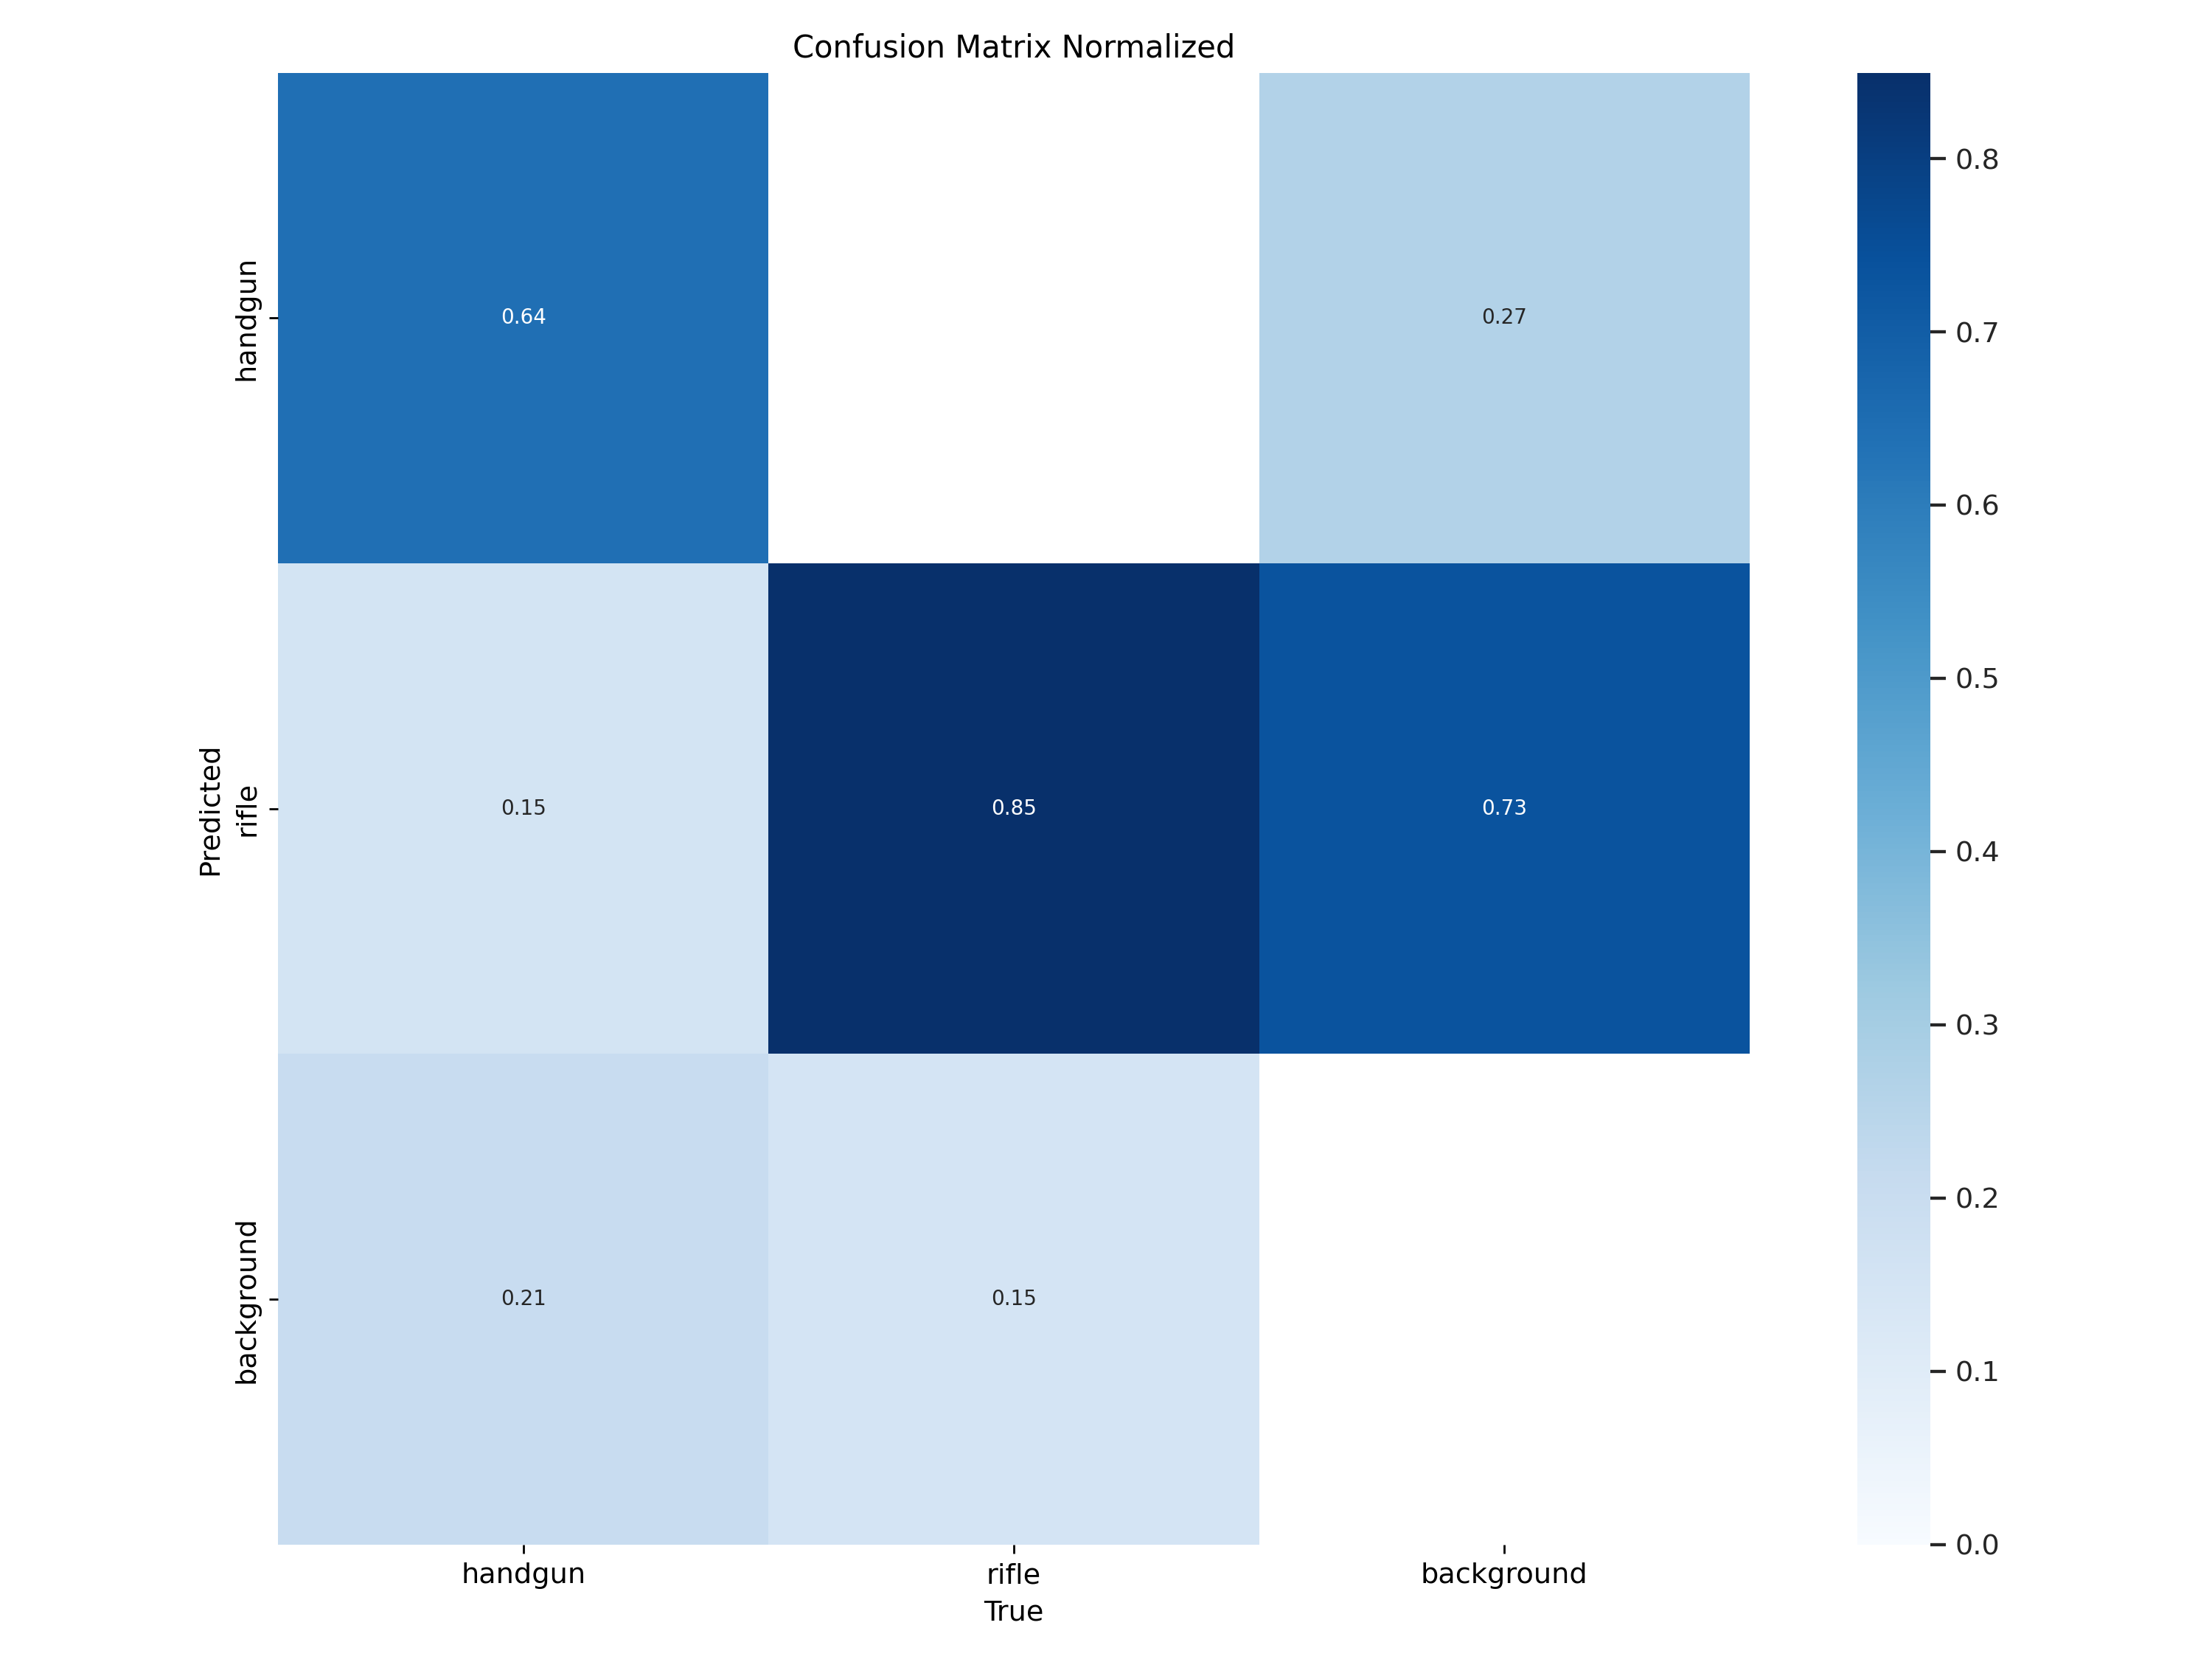

In [31]:
Image(filename = f'/content/runs/detect/train4/confusion_matrix_normalized.png')

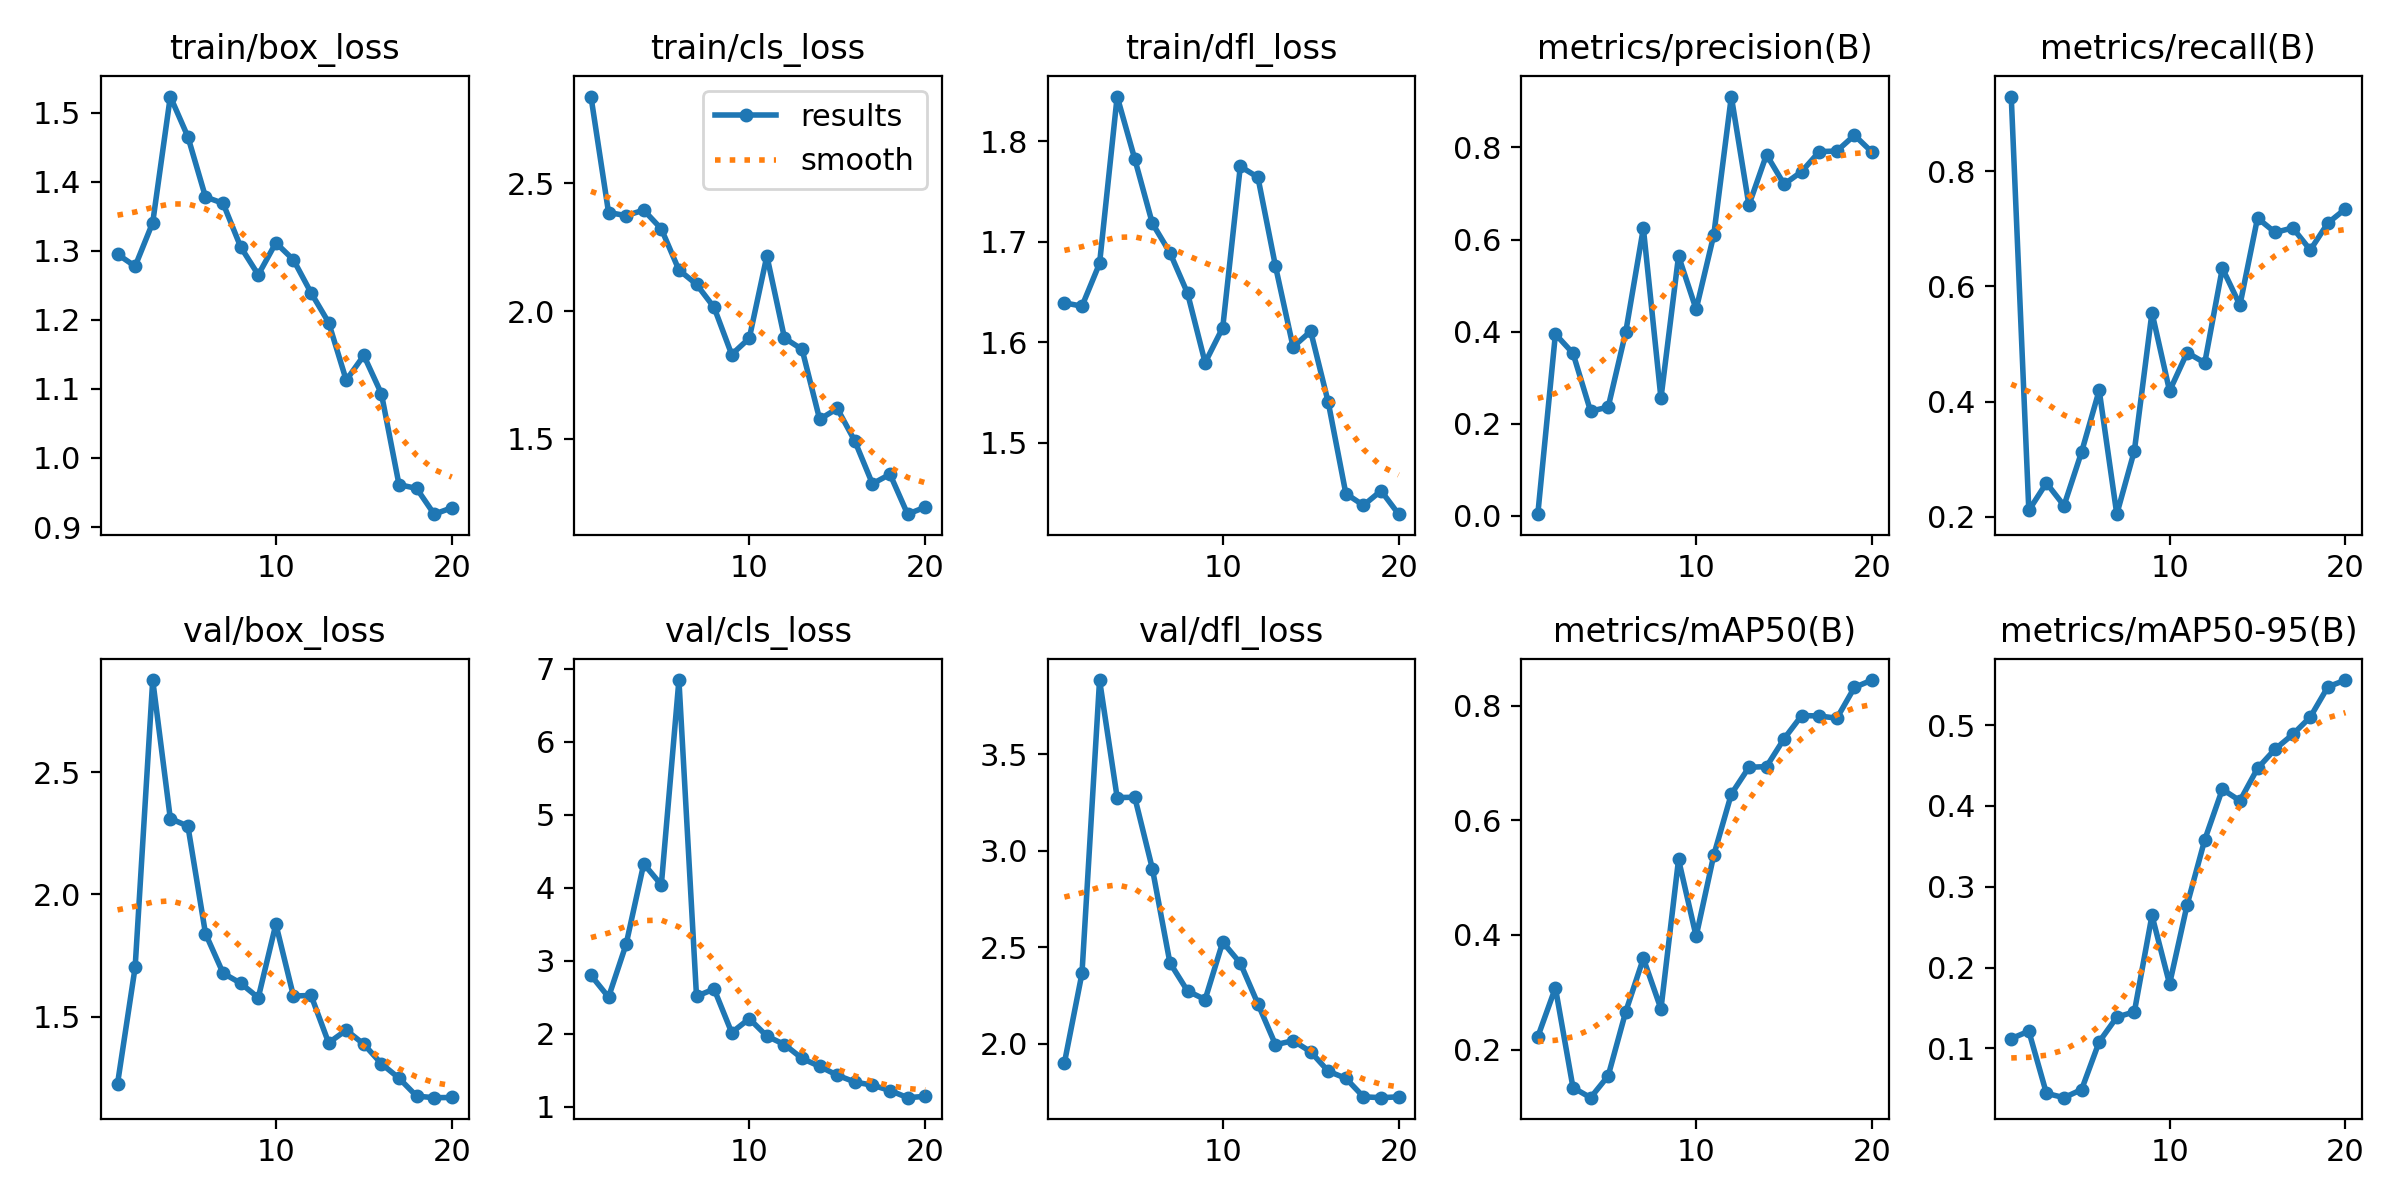

In [34]:
Image(filename = f'/content/runs/detect/train4/results.png')


image 1/1 /content/Weapon-classification-1/test/images/2--210-_jpg.rf.75307c969e98293860f628aa03ffa210.jpg: 640x640 1 rifle, 7.8ms
Speed: 1.6ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Weapon-classification-1/test/images/2--134-_jpg.rf.5294e0e9e515edb6d9bc29864f4b9ff1.jpg: 640x640 1 rifle, 7.6ms
Speed: 1.7ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Weapon-classification-1/test/images/2--25-_jpg.rf.160ac92b2413a2323be90818b83327ba.jpg: 640x640 2 rifles, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Weapon-classification-1/test/images/2--325-_jpg.rf.06a859fcfa8c7b00bf0dedfbe86b3ef1.jpg: 640x640 3 rifles, 10.4ms
Speed: 1.6ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Weapon-classification-1/test/images/2--242-_jpg.rf.26610ef5614c6a

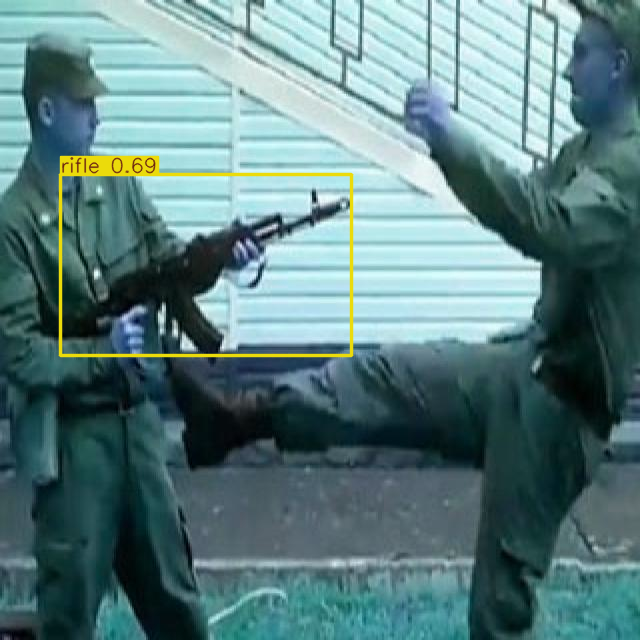


image 1/1 /content/Weapon-classification-1/test/images/2--134-_jpg.rf.5294e0e9e515edb6d9bc29864f4b9ff1.jpg: 640x640 1 rifle, 17.8ms
Speed: 1.9ms preprocess, 17.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
True Label: unknown


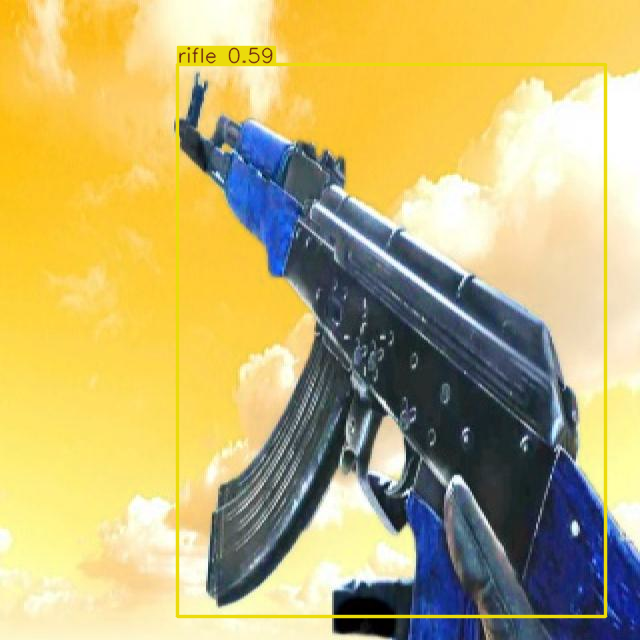


image 1/1 /content/Weapon-classification-1/test/images/2--25-_jpg.rf.160ac92b2413a2323be90818b83327ba.jpg: 640x640 2 rifles, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
True Label: unknown


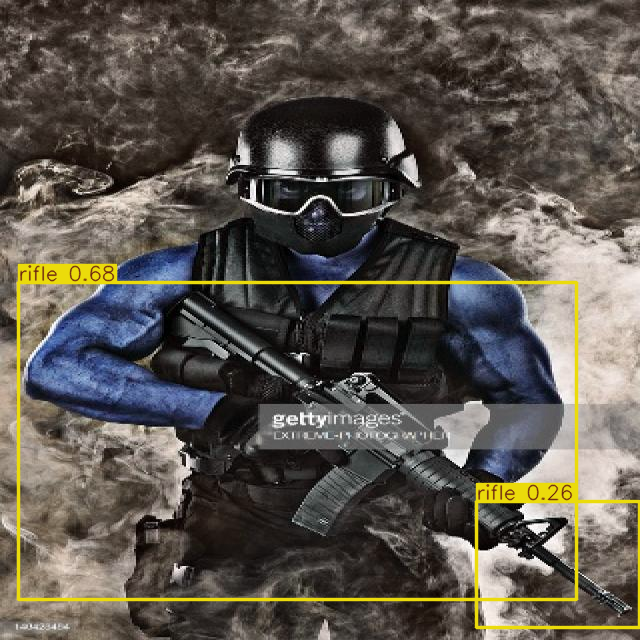


image 1/1 /content/Weapon-classification-1/test/images/2--325-_jpg.rf.06a859fcfa8c7b00bf0dedfbe86b3ef1.jpg: 640x640 3 rifles, 16.7ms
Speed: 2.4ms preprocess, 16.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
True Label: unknown


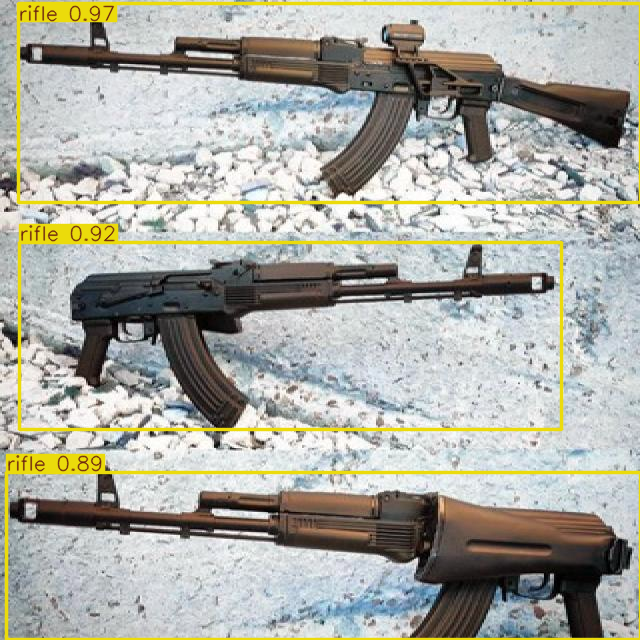


image 1/1 /content/Weapon-classification-1/test/images/2--242-_jpg.rf.26610ef5614c6a5466cd501054f93306.jpg: 640x640 1 rifle, 10.2ms
Speed: 2.4ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
True Label: unknown


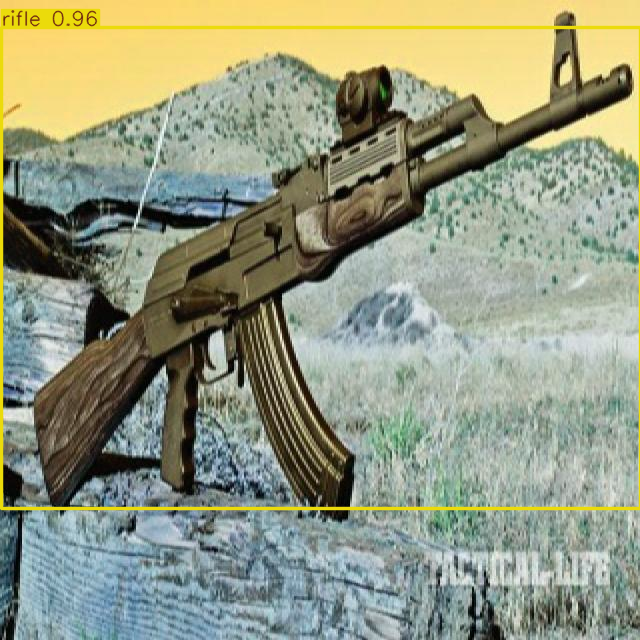

In [53]:
import os
import random
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from PIL import Image as PILImage
from IPython.display import display
from ultralytics import YOLO

def get_true_label_from_path(img_path):
    file_name = os.path.basename(img_path).lower()
    if 'rifle' in file_name:
        return 'rifle'
    elif 'pistol' in file_name:
        return 'pistol'
    else:
        return 'unknown'

def calculate_metrics(true_labels, pred_labels):
    precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=1)
    recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=1)
    f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=1)
    return precision, recall, f1

def get_true_pred_labels(dataset, model):
    true_labels = []
    pred_labels = []

    for img_path in dataset:
        results = model(img_path)
        true_label = get_true_label_from_path(img_path)
        if len(results[0].boxes) > 0:
            pred_label = results[0].names[int(results[0].boxes[0].cls[0].item())]
        else:
            pred_label = 'none'

        true_labels.append(true_label)
        pred_labels.append(pred_label)

    return true_labels, pred_labels

model = YOLO('/content/runs/detect/train4/weights/best.pt')

image_directory = '/content/Weapon-classification-1/test/images'
all_images = [os.path.join(image_directory, img) for img in os.listdir(image_directory) if img.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 5)

true_labels, pred_labels = get_true_pred_labels(random_images, model)

for img_path, true_label, pred_label in zip(random_images, true_labels, pred_labels):
    print(f'Image: {img_path} | True Label: {true_label} | Predicted Label: {pred_label}')

precision, recall, f1 = calculate_metrics(true_labels, pred_labels)

for img_path, true_label in zip(random_images, true_labels):
    results = model(img_path)
    for result in results:

        result_img = result.plot()

        result_img = PILImage.fromarray(result_img)

        print(f'True Label: {true_label}')
        display(result_img)


PRECISION,RECALL AND F1-SCORE

In [50]:
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 1.0
Recall: 0.0
F1-Score: 0.0


MATRIX 2 WITH 20 EPOCHS: Confusion Matrix 2 is better at correctly detecting handguns and rifles, although it has higher detection errors for backgrounds detected as handguns and rifles.


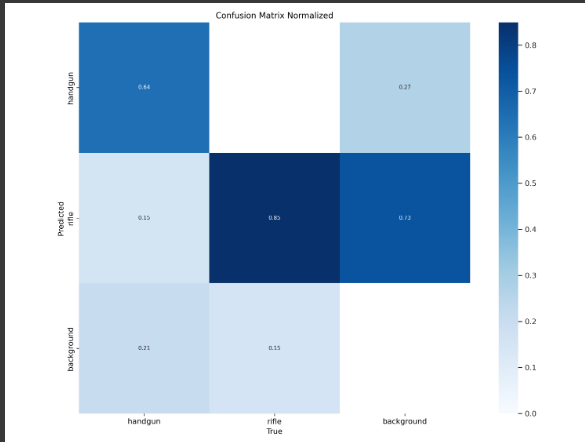

MATRIX 1 WITH 10 EPOCHS:  Confusion Matrix 1 is better at reducing detection errors for rifles and handguns detected as background.

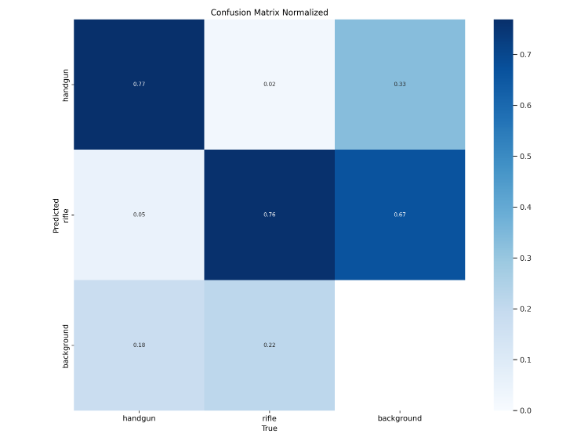

Process:

Dataset Preparation:

Dataset "weapon-classification" was downloaded from Roboflow.
The dataset was split into training, validation, and test sets.
Model Training:

The YOLOv8n model was trained for 10 epochs with an image size of 640x640.
Training was performed using the provided dataset and configuration file.

And i was trained again for 20 epochs

Model Evaluation:

The model was evaluated on the validation set.
Performance metrics such as mAP (mean Average Precision), precision, and recall should be calculated and analyzed (not included in the code).
but i try to calculated the recall and precision but it only 0.0


Prediction and Visualization:

The trained model was used to make predictions on a random subset of test images.
Detection results were visualized to verify the model's performance qualitatively.

Performance Analysis:

Detailed analysis of performance on train, validation, and test sets is required to understand model accuracy, precision, recall, and potential overfitting.

**Bisa menambah penjelasan motivasi/urgency case kalian, serta future directions**


**It's really important to classify weapons correctly so that security and surveillance systems can spot and deal with any possible dangers fast. Making a really good model can make automated surveillance systems way better at their
job.**

-this project can be using by airport security system to help scanning the criminal who bring the gun
-to find easily the gun on the crowded place
-to find and analys for types of gun is it rifle or handgun

**Future Directions:**

Enhance the model by adding extra data and increasing the training time to boost its performance.

Implement advanced techniques such as transfer learning and data augmentation

Investigate how to use the model in real-time systems to detect and classify weapons.

KESIMPULAN


THIS PROJECT SHOWING ME THE GOOD MODEL BY YOLOV8 WITH THE SIMPLE CODE, AND THE MODEL SHOWING US THE GOOD RESULT AND PRECISION FOR THE OBJECT DETECTION IN GUN DETECTION OF IMAGE DATASET

BUT IN THIS MODEL I DONT CALCULATED THE F1 SCORE AND RECALL SO THATS THE DISADVANTAGES OF THIS MODEL